<a href="https://colab.research.google.com/github/olesia-za/python_for_ds_tasks/blob/main/OZ_Done_10_HW2_Data_visualization_with_Matplotlib_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

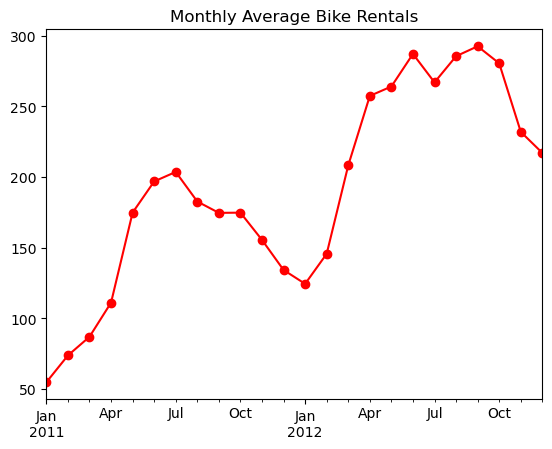

In [105]:
df_average_month_rent = df['count'].resample('ME').mean()
# df.groupby(['year', 'month'])['count'].mean()
# df['count'].resample('ME').mean().plot(
df_average_month_rent.plot(
    marker='o',
    color ='red',
    title='Monthly Average Bike Rentals',
    xlabel='',
);

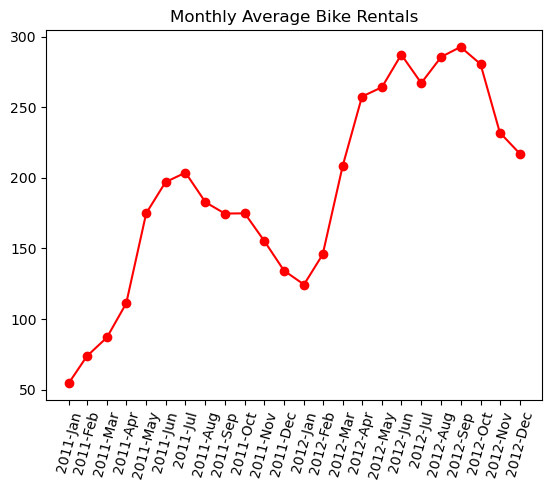

In [106]:
plt.plot(df_average_month_rent,"-or")
plt.title('Monthly Average Bike Rentals')
plt.xticks(df_average_month_rent.index,[el.strftime('%Y-%b') for el in df_average_month_rent.index], rotation=75)
plt.xlabel('');
# Простіше побудувати 1ий графік 

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [107]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

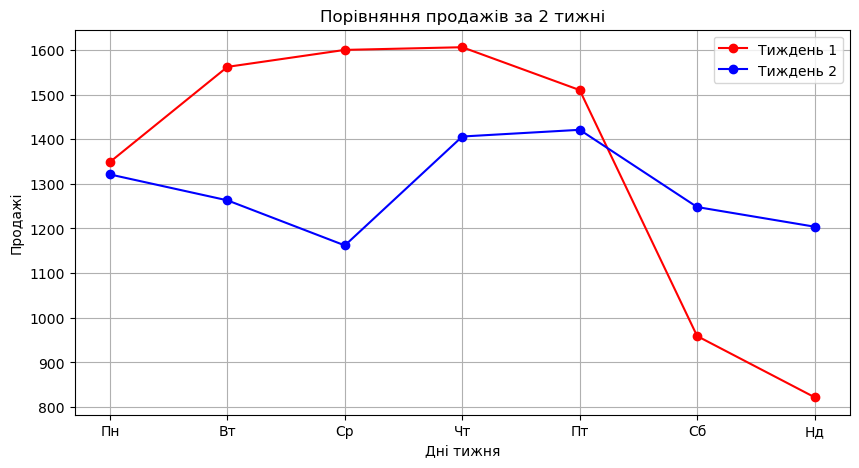

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(days, sales_week1, '-or', label='Тиждень 1')
plt.plot(days, sales_week2, '-ob', label='Тиждень 2')
plt.title('Порівняння продажів за 2 тижні')
plt.xlabel('Дні тижня')
plt.ylabel('Продажі')
plt.xticks(days, ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд'])
plt.legend()
plt.grid(True)
plt.show();
# 1) продажі стабільші за 2 тиждень, ніж за 1
# 2) нижче побудовано графік розкиду продажів за 2 тижні - це дозволяє побачити, що розкид продажів за 1 тиждень суттєво більший, ніж за 2 тиждень

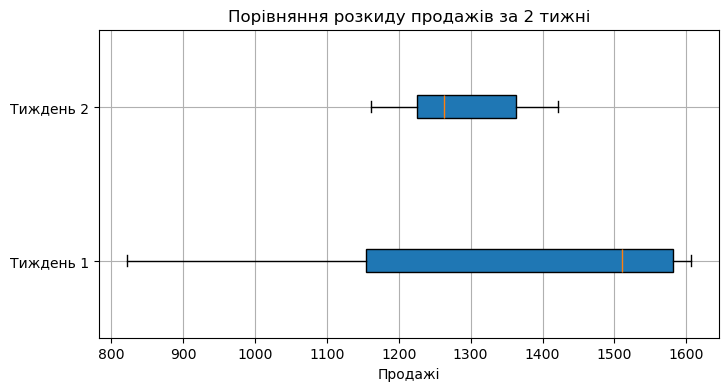

In [109]:
# 2 графік розкиду продажів за 2 тижні - це дозволяє побачити, що розкид продажів за 1 тиждень суттєво більший, ніж за 2 тиждень
plt.figure(figsize=(8, 4))
plt.boxplot([sales_week1, sales_week2], vert=False, patch_artist=True, tick_labels=['Тиждень 1', 'Тиждень 2'])
plt.title('Порівняння розкиду продажів за 2 тижні')
plt.xlabel('Продажі')
plt.grid(True)
plt.show();

In [ ]:
pd.Series(sales_week1).describe(), pd.Series(sales_week2).describe()

(count       7.000000
 mean     1344.000000
 std       324.035492
 min       822.000000
 25%      1154.000000
 50%      1510.000000
 75%      1581.000000
 max      1606.000000
 dtype: float64,
 count       7.000000
 mean     1289.285714
 std        98.189806
 min      1162.000000
 25%      1226.000000
 50%      1263.000000
 75%      1363.500000
 max      1421.000000
 dtype: float64)

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

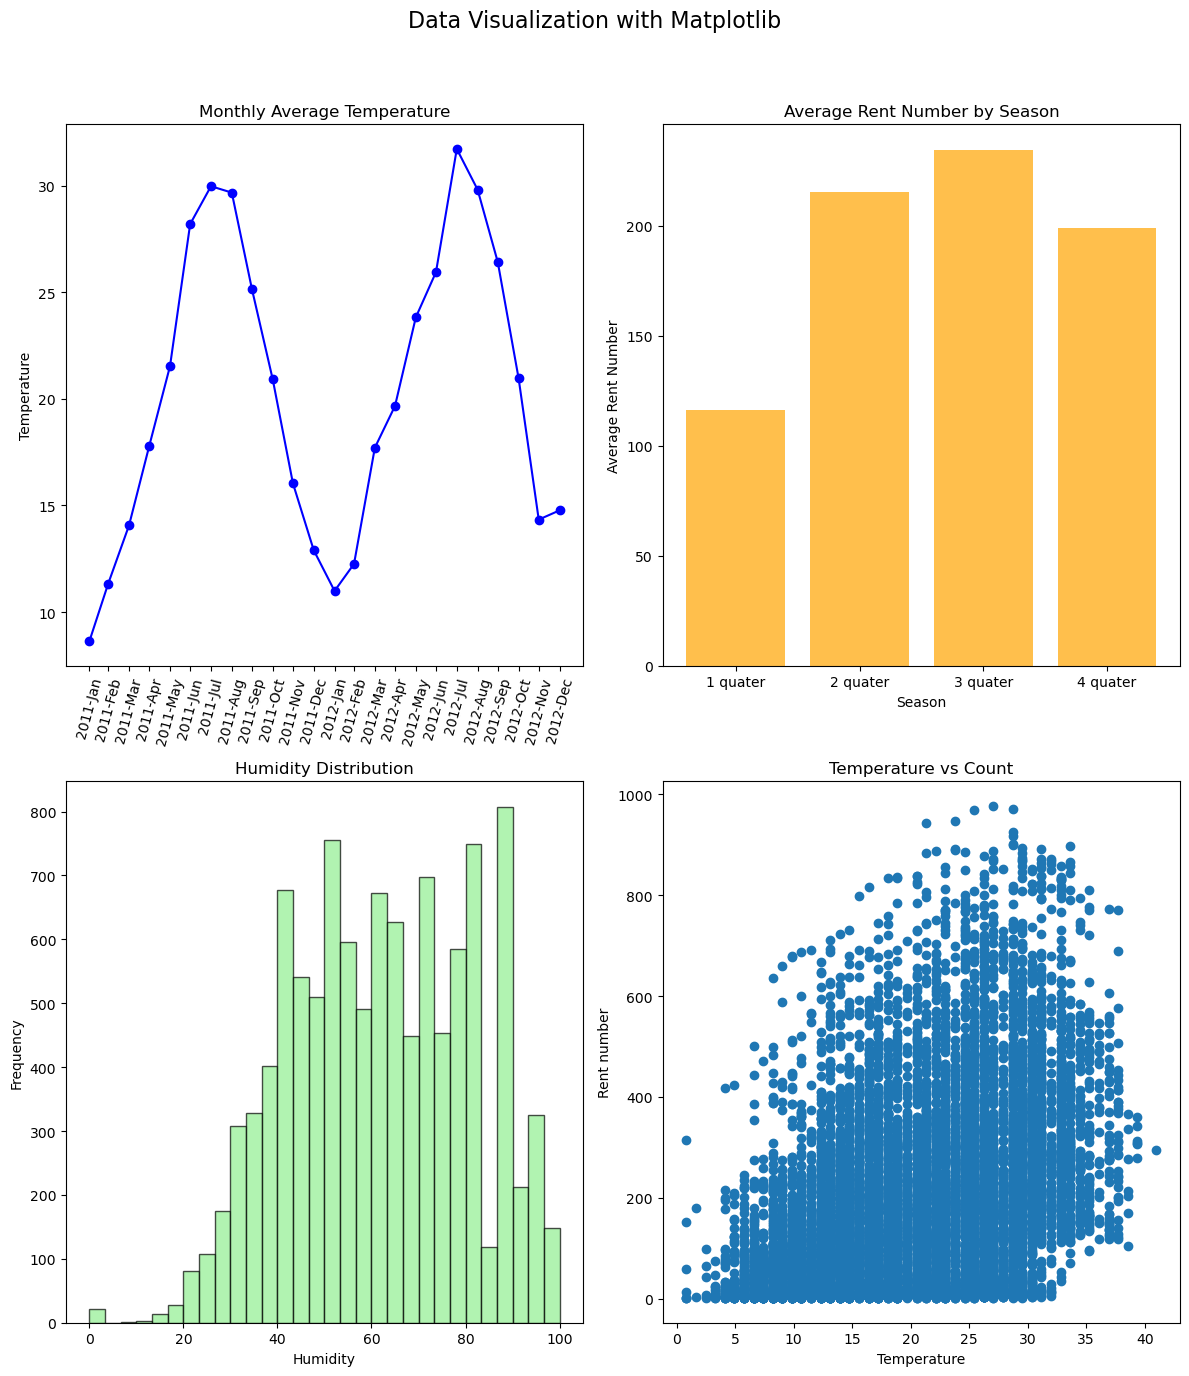

In [151]:
# 1ий графік - середня температура за місяць
plt.figure(figsize=(12, 14))
plt.suptitle('Data Visualization with Matplotlib', fontsize=16)
plt.subplot(2, 2, 1)
plt.plot(df['temp'].resample("ME").mean(), marker='o', color='blue')
plt.xticks(df_average_month_rent.index,[el.strftime('%Y-%b') for el in df_average_month_rent.index], rotation=75)
plt.xlabel('')
plt.ylabel('Temperature')
plt.title('Monthly Average Temperature');

# 2ий графік - середня кількість орендованих велосипедів за місяць
plt.subplot(2, 2, 2)
plt.bar(df['season'].unique(), df.groupby(['season'])['count'].mean(), color='orange', alpha=0.7)
plt.xticks(df['season'].unique(),['1 quater', '2 quater', '3 quater', '4 quater'])
plt.xlabel('Season')
plt.ylabel('Average Rent Number')
plt.title('Average Rent Number by Season');

# 3ий графік - розподіл вологості
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution');

# 4ий графік - розподіл температури та кількість орендованих велосипедів
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'])
plt.xlabel('Temperature')
plt.ylabel('Rent number')
plt.title('Temperature vs Count');
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

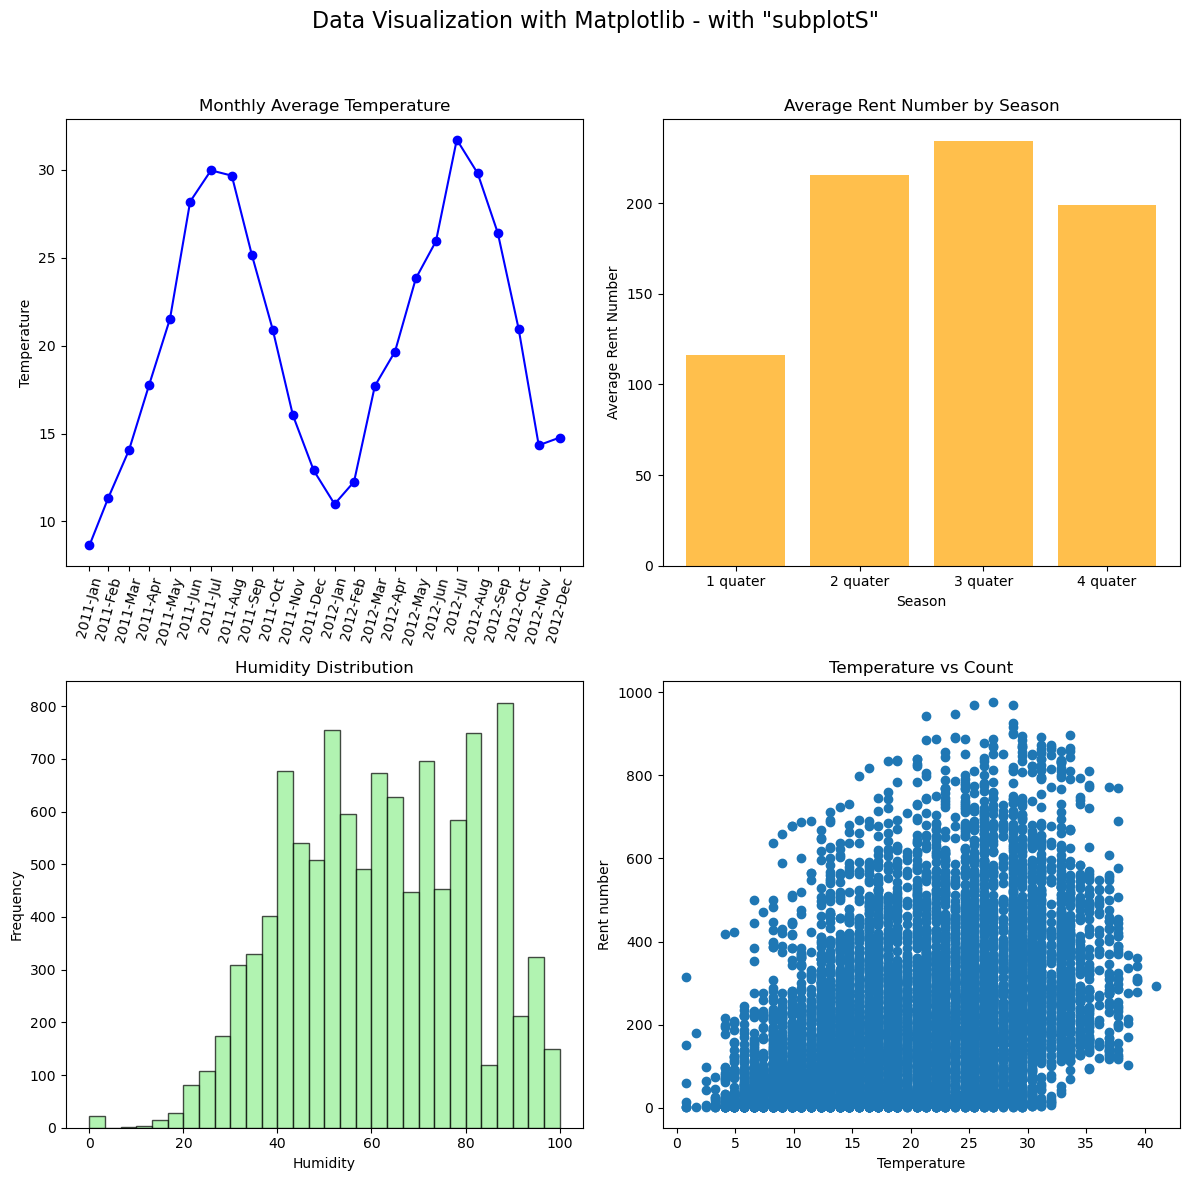

In [228]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plt.suptitle('Data Visualization with Matplotlib - with "subplotS"', fontsize=16)
# 1ий графік - середня температура за місяць
ax[0, 0].plot(df['temp'].resample("ME").mean(), '-ob')
ax[0, 0].set_xticks(df_average_month_rent.index)
ax[0, 0].set_xticklabels([el.strftime('%Y-%b') for el in df_average_month_rent.index], rotation=75)
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Temperature')
ax[0, 0].set_title('Monthly Average Temperature');  

# 2ий графік - середня кількість орендованих велосипедів за місяць
ax[0, 1].bar(df['season'].unique(), df.groupby(['season'])['count'].mean(), color='orange', alpha=0.7)
ax[0, 1].set_xticks(df['season'].unique())
ax[0, 1].set_xticklabels(['1 quater', '2 quater', '3 quater', '4 quater'])
ax[0, 1].set_xlabel('Season')
ax[0, 1].set_ylabel('Average Rent Number')
ax[0, 1].set_title('Average Rent Number by Season');

# 3ий графік - розподіл вологості
ax[1, 0].hist(df['humidity'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax[1, 0].set_xlabel('Humidity')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_title('Humidity Distribution');     
                           
# 4ий графік - розподіл температури та кількість орендованих велосипедів
ax[1, 1].scatter(df['temp'], df['count'])
ax[1, 1].set_xlabel('Temperature')
ax[1, 1].set_ylabel('Rent number')
ax[1, 1].set_title('Temperature vs Count');
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

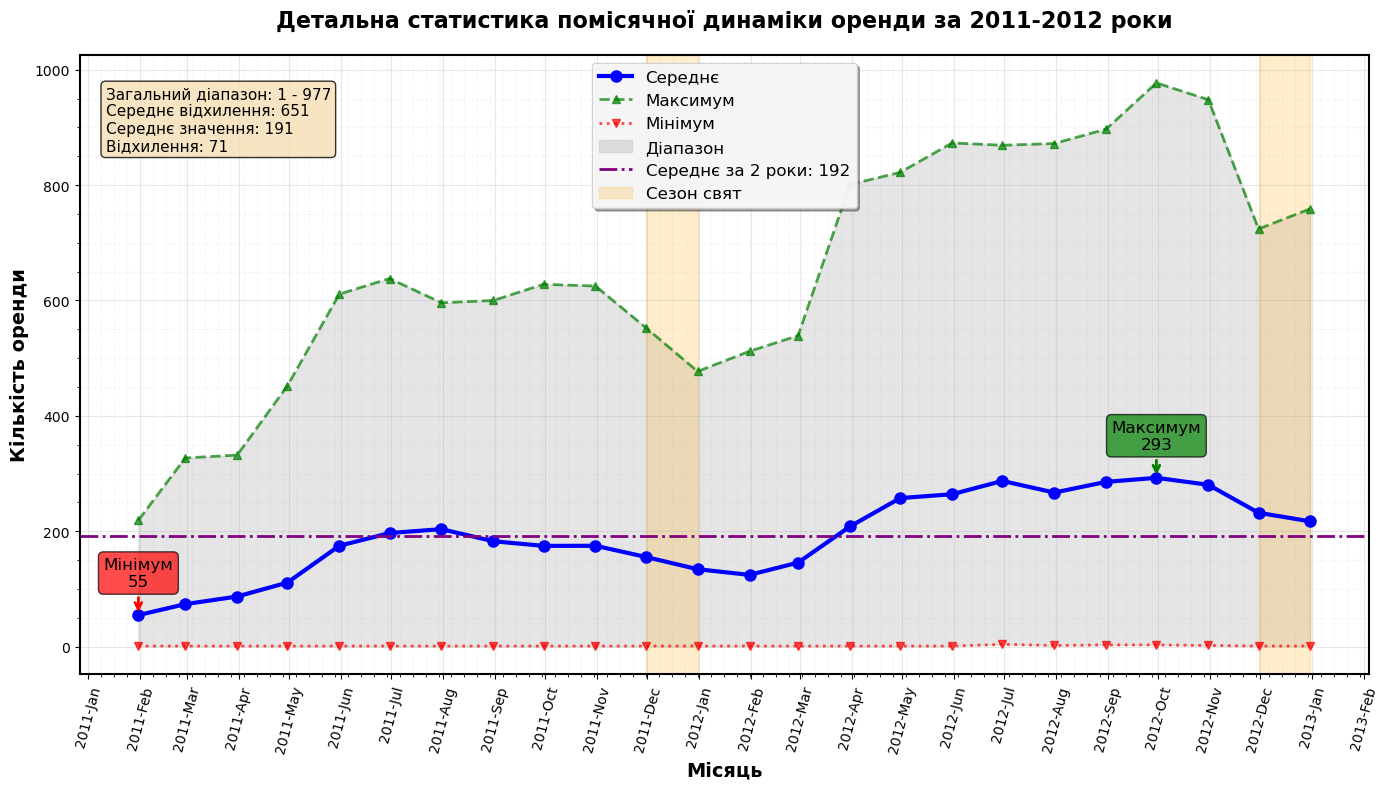

In [229]:
import matplotlib.dates as mdates
df_month_rent = df['count'].resample('ME').agg(['mean', 'min', 'max'])

fig, ax = plt.subplots(figsize=(14, 8))
# Малюємо лінії з різними стилями
ax.plot(df_month_rent.index, df_month_rent['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(df_month_rent.index, df_month_rent['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(df_month_rent.index, df_month_rent['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min (правильний синтаксис)
ax.fill_between(df_month_rent.index, df_month_rent['min'], df_month_rent['max'],
                alpha=0.2, color='gray', label='Діапазон')

# Додаємо анотації для екстремальних значень
mean_max_idx = df_month_rent['mean'].idxmax()
mean_max_val = df_month_rent['mean'].max()
ax.annotate(f'Максимум\n{mean_max_val:.0f}',
            xy=(mean_max_idx, mean_max_val), xytext=(mean_max_idx, mean_max_val + 50),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.7))

mean_min_idx = df_month_rent['mean'].idxmin()
mean_min_val = df_month_rent['mean'].min()
ax.annotate(f'Мінімум\n{mean_min_val:.0f}',
            xy=(mean_min_idx, mean_min_val), xytext=(mean_min_idx, mean_min_val + 50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика помісячної динаміки оренди за 2011-2012 роки',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=75)

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за 2 роки: {overall_mean:.0f}')

# Виділяємо зони (листопад-грудень)
if len(df_month_rent) >= 12:
    ax.axvspan(df_month_rent.index[10], df_month_rent.index[11], alpha=0.2,
               color='orange', label='Сезон свят')
if len(df_month_rent) >= 24:
    ax.axvspan(df_month_rent.index[22], df_month_rent.index[23], alpha=0.2,
               color='orange' )

# Покращуємо легенду
ax.legend(loc='upper center', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Додаємо текст з додатковою статистикою
textstr = f'Загальний діапазон: {df_month_rent["min"].min():.0f} - {df_month_rent["max"].max():.0f}\n'
textstr += f'Середнє відхилення: {(df_month_rent["max"] - df_month_rent["min"]).mean():.0f}\n'
textstr += f'Середнє значення: {df_month_rent['mean'].mean():.0f}\n'
textstr += f'Відхилення: {df_month_rent['mean'].std():.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()
# 1) анотація додає акцент(увагу) та додаткову інформацію на виззначених точках
# 2) заливка між max та min дозволяє візуально виділити діапазон значень в динаміці
# 3) текст додає розуміння порядку помісячного розкиду значень за весь період